# Titanic Data Analysis Overview

### Why was this data chosen?

Movie Titanic is famous, and this film made the shipwrecks well-known for the humanism the victims showed to save women and kids first. This analysis is focused on proving if females and children had been rescued first in reality and it will also figure out the probability of the movie in which Leonardo Dicaprio died, and Kate Winslet survived.

### How will the data be investigated?

- Correlation between variables
- What factor did impact most for survivors to survive?
- Is it true that people protected women and kids first?
- If the sentence above is correct, what did other factors influence for survivors who are not children or female? 

# Data Source

Titanic: Machine Learning from Disaster
- [kaggle link](https://www.kaggle.com/c/titanic/data)

### Data Dictionary


| Variable | Definition | Key |
| --- | :---: | :---: |
|survival |	Survival |	0 = No, 1 = Yes |
| pclass |	Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
| sex |	Sex	||
| Age |	Age in years ||
| sibsp | # of siblings / spouses aboard the Titanic	||
| parch | # of parents / children aboard the Titanic	||
| ticket | Ticket number	||
| fare | Passenger fare	||
| cabin | Cabin number	||
| embarked | Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton ||


### Variable Notes

pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

# Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib as pt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_ratio_plot(target, title=None, xlabel=None, ylabel=None):
    assert(title is not None)
    assert(xlabel is not None)
    assert(ylabel is not None)
    size = df.groupby([target]).size()
    survival_size_by_target = df.groupby([target]).sum()["Survived"]
    survival_rate_by_target = 1 - (size-survival_size_by_target) / size
    ax = survival_rate_by_target.plot(title=title)
    ax.set(xlabel=xlabel, ylabel=ylabel)

In [3]:
def get_histogram_plot(target, bins=10, title=None, xlabel=None, dropna=False):
    assert(title is not None)
    assert(xlabel is not None)
    
    target_df = df[df["Survived"] == 1][target]
    if dropna:
        target_df = target_df.dropna()
    ax = target_df.plot(kind="hist", bins=bins, title=title)
    ax.set(xlabel=xlabel)

### General Information

The number of passengers was 891, and the percentage of survivor was 38%

In [4]:
df = pd.read_csv("titanic-data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(["PassengerId", "Name"], 1).describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Why did victims help survivors instead of saving themselves?
- **Pclass** and **Fare** are related the most even though the value is negative because *Pclass indicates 1st class by 1, 2nd class by 2 and 3rd class by 3*.
- The factors which impacted most on the survival rate were **Sex**, **Pclass**, **Fare** in order.
- The factors of which values are text have few values in common, so it is hard to find the correlation between them such as **Ticket**, **Cabin**.
- However, **Ticket** and **Cabin** name were related to Pclass.
- **CAVEAT!** 177 out of 891 rows have no age date, the correlation is calculated without the rows 

In [6]:
from itertools import combinations

numerical_columns = ["Survived", "Pclass", "SibSp", "Parch", "Fare", "Age", "SexNum"]
print("The number of row without age data : {}/{}\n".format(
    df[df["Age"].isnull()]["PassengerId"].count(), df["PassengerId"].count()))
clean_df = df[df["Age"].notnull()].copy(deep=True)
clean_df["SexNum"] = clean_df["Sex"].apply(lambda s: 0 if s == "male" else 1)
corr_list = [(x, y, np.corrcoef(clean_df[x], clean_df[y])[0, 1]) for x, y in combinations(numerical_columns, 2)]
for x, y, corr_rate in sorted(corr_list, key=lambda x: abs(x[2]), reverse=True)[:15]:
    print("{} & {}, corr: {:.2f}".format(x, y, round(corr_rate, 2)))

The number of row without age data : 177/891

Pclass & Fare, corr: -0.55
Survived & SexNum, corr: 0.54
SibSp & Parch, corr: 0.38
Pclass & Age, corr: -0.37
Survived & Pclass, corr: -0.36
SibSp & Age, corr: -0.31
Survived & Fare, corr: 0.27
Parch & SexNum, corr: 0.25
Parch & Fare, corr: 0.21
Parch & Age, corr: -0.19
Fare & SexNum, corr: 0.18
Pclass & SexNum, corr: -0.16
SibSp & Fare, corr: 0.14
SibSp & SexNum, corr: 0.10
Fare & Age, corr: 0.10


In [7]:
df["Ticket"].value_counts()[:5]

347082      7
1601        7
CA. 2343    7
CA 2144     6
347088      6
Name: Ticket, dtype: int64

In [8]:
df["Cabin"].value_counts()[:5]

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
D              3
Name: Cabin, dtype: int64

In [9]:
df.groupby(["Pclass", "Cabin"])["Survived"].count()

Pclass  Cabin
1       A10      1
        A14      1
        A16      1
        A19      1
        A20      1
        A23      1
        A24      1
        A26      1
        A31      1
        A32      1
        A34      1
        A36      1
        A5       1
        A6       1
        A7       1
        B101     1
        B102     1
        B18      2
        B19      1
        B20      2
        B22      2
        B28      2
        B3       1
        B30      1
        B35      2
        B37      1
        B38      1
        B39      1
        B4       1
        B41      1
                ..
        E31      1
        E33      2
        E34      1
        E36      1
        E38      1
        E40      1
        E44      2
        E46      1
        E49      1
        E50      1
        E58      1
        E63      1
        E67      2
        E68      1
        E8       2
        T        1
2       D        3
        D56      1
        E101     3
        E77      1
        F2       

In [10]:
df.groupby(["Pclass", "Ticket"]).sum()["Survived"].iloc[120:300]

Pclass  Ticket         
1       PC 17590           0
        PC 17592           1
        PC 17593           0
        PC 17595           0
        PC 17596           0
        PC 17597           0
        PC 17599           1
        PC 17600           0
        PC 17601           0
        PC 17603           1
        PC 17604           1
        PC 17605           0
        PC 17608           2
        PC 17609           0
        PC 17610           1
        PC 17611           2
        PC 17612           0
        PC 17754           0
        PC 17755           3
        PC 17756           1
        PC 17757           3
        PC 17758           1
        PC 17759           1
        PC 17760           2
        PC 17761           1
        W.E.P. 5734        0
        WE/P 5735          1
2       11668              0
        12233              0
        2003               1
                          ..
        SC 1748            1
        SC/AH 29037        0
        SC/AH 3085 

### Did more females survive?
- 74% of women survived out of 314
- 19% of men survived out of 577

In [11]:
print("The number of female : ", df[df["Sex"] == "female"]["PassengerId"].count())
print("The number of male : ", df[df["Sex"] == "male"]["PassengerId"].count())

The number of female :  314
The number of male :  577


In [12]:
sex_count = df.groupby("Sex").count()["Survived"]
sex_survival_count = df.groupby("Sex").sum()["Survived"]
survival_ratio_by_sex = 1 - (sex_count - sex_survival_count) / sex_count
survival_ratio_by_sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### Did more kids survive?
- The survival rate from 0 to 30 is decreasing.
- The survival rate from 0 to 10 is over 50%, and the rate is relatively higher than the average (38%)

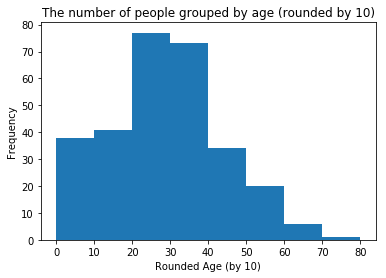

In [13]:
bin_size = 8
df["AroundAge"] = df["Age"] - df["Age"] % 10
get_histogram_plot("AroundAge", 
                   bins=bin_size, 
                   title="The number of people grouped by age (rounded by 10)", 
                   dropna=True, 
                   xlabel="Rounded Age (by 10)")

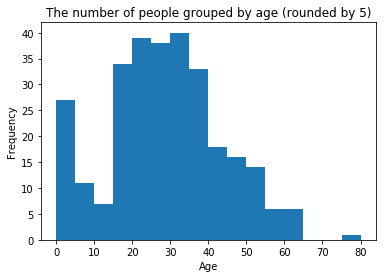

In [14]:
divider = 5
bin_size = bin_size * 10 // divider
df["AroundAge"] = df["Age"] - df["Age"] % divider
get_histogram_plot("AroundAge", 
                   title="The number of people grouped by age (rounded by 5)", 
                   xlabel="Age", 
                   bins=bin_size)

In [15]:
around_age_size = df.groupby(["AroundAge"]).size()
survival_size_by_age = df.groupby(["AroundAge"]).sum()["Survived"]
survival_rate_by_age = 1 - (around_age_size-survival_size_by_age) / around_age_size
survival_rate_by_age

AroundAge
0.0     0.675000
5.0     0.500000
10.0    0.437500
15.0    0.395349
20.0    0.342105
25.0    0.358491
30.0    0.421053
35.0    0.458333
40.0    0.375000
45.0    0.390244
50.0    0.437500
55.0    0.375000
60.0    0.400000
65.0    0.000000
70.0    0.000000
80.0    1.000000
dtype: float64

### How did money affect the survival rate?
- The survival rate of 1st class passengers was over 60%
- However, the fare of ticket was not a key factor to survive because the price range was wide to buy 1st class tickets (\$0 to \$510)
- Where passengers are from is also related to the survival rate. The ratio of travelers from **Cherbourg** was highest because the proportion of the 1st class was the biggest.

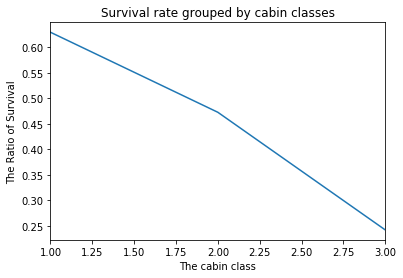

In [16]:
get_ratio_plot("Pclass", 
               title="Survival rate grouped by cabin classes", 
               xlabel="The cabin class", 
               ylabel="The Ratio of Survival")

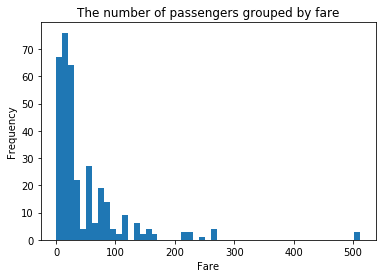

In [17]:
get_histogram_plot("Fare", 
                   bins=51, 
                   title="The number of passengers grouped by fare", 
                   xlabel="Fare")

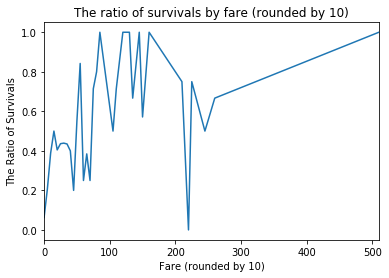

In [18]:
df["AroundFare"] = df["Fare"] - df["Fare"] % 5
get_ratio_plot("AroundFare", 
               title="The ratio of survivals by fare (rounded by 10)", 
               xlabel="Fare (rounded by 10)", 
               ylabel="The Ratio of Survivals")

In [19]:
df.groupby(["AroundFare", "Pclass"])["Survived"].count()

AroundFare  Pclass
0.0         1           5
            2           6
            3           5
5.0         1           1
            3         319
10.0        2          88
            3          33
15.0        2          10
            3          48
20.0        2          12
            3          30
25.0        1          36
            2          43
            3          15
30.0        1          19
            2           7
            3          15
35.0        1           9
            2           8
            3           6
40.0        1           2
            2           3
45.0        1           4
            3           6
50.0        1          20
55.0        1          12
            3           7
60.0        1           4
65.0        1           4
            2           2
            3           7
70.0        1           3
            2           5
75.0        1          21
80.0        1          10
85.0        1           5
90.0        1           8
105.0       1      

In [20]:
embarked_count = df.groupby("Embarked").count()["Survived"]
embarked_survival_count = df.groupby("Embarked").sum()["Survived"]
survival_ratio_by_embarked = 1 - (embarked_count - embarked_survival_count) / embarked_count
survival_ratio_by_embarked

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [21]:
df.groupby(["Pclass", "Embarked"])["Survived"].describe()

count      mean       std  min   25%  50%   75%  max
Pclass Embarked                                                      
1      C          85.0  0.694118  0.463515  0.0  0.00  1.0  1.00  1.0
       Q           2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0
       S         127.0  0.582677  0.495070  0.0  0.00  1.0  1.00  1.0
2      C          17.0  0.529412  0.514496  0.0  0.00  1.0  1.00  1.0
       Q           3.0  0.666667  0.577350  0.0  0.50  1.0  1.00  1.0
       S         164.0  0.463415  0.500187  0.0  0.00  0.0  1.00  1.0
3      C          66.0  0.378788  0.488802  0.0  0.00  0.0  1.00  1.0
       Q          72.0  0.375000  0.487520  0.0  0.00  0.0  1.00  1.0
       S         353.0  0.189802  0.392701  0.0  0.00  0.0  0.00  1.0

### The Power of Love?
- The survival rate of survivors who had 1-3 sibling(s) or spouse was greater than the average (38%).
- The survival rate of survivors who had 1-3 children/child or parent(s) was higher than the mean (38%).
- Nevertheless, at a certain point, the rate is decreasing.

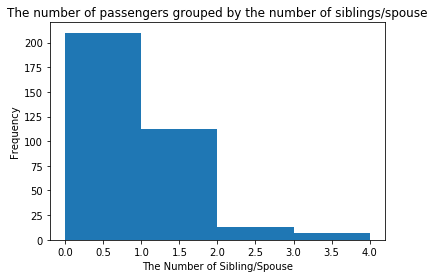

In [22]:
get_histogram_plot("SibSp", 
                   title="The number of passengers grouped by the number of siblings/spouse", 
                   xlabel="The Number of Sibling/Spouse", 
                   bins=4)

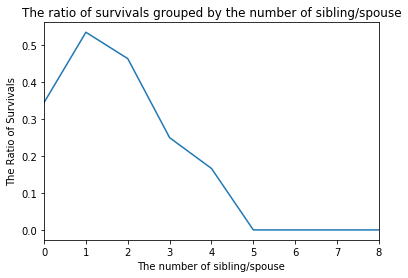

In [23]:
get_ratio_plot("SibSp", 
               title="The ratio of survivals grouped by the number of sibling/spouse", 
               xlabel="The number of sibling/spouse", 
               ylabel="The Ratio of Survivals")

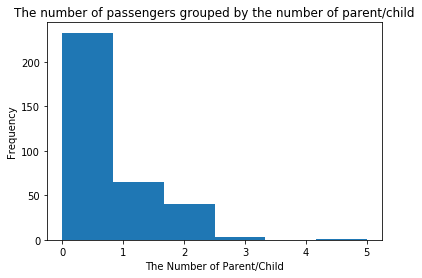

In [24]:
get_histogram_plot("Parch", 
                   bins=6, 
                   title="The number of passengers grouped by the number of parent/child", 
                   xlabel="The Number of Parent/Child")

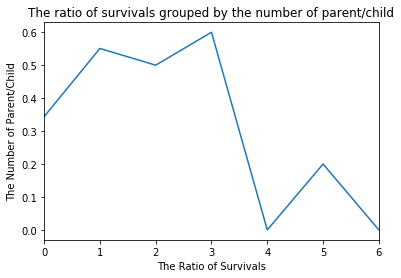

In [25]:
get_ratio_plot("Parch", 
               title="The ratio of survivals grouped by the number of parent/child",
               xlabel="The Ratio of Survivals",
               ylabel="The Number of Parent/Child")

# Conclusion

- The key factors to survive in Titanic were **Sex**, **Age**, and **Class** of cabin
- Assuming that Leonardo Dicaprio was 20-25, 3rd class, male, and Kate Winslet was 20-25, 1st class, female
- Leonardo's survival rate is 0.1 and Kate's survival rate is 1. Then the probability of movie Titanic was 90% (Leonardo was dead and Kate survived.) Good job, James Cameron.
- Considering that Leonardo had no child, parent, sibling, spouse in the ship, the result is worse, 8%.

### The limitation of this analysis

The shipwrecks happened on April 15, 1912, killing 1502 out of 2224 passengers and crew. But this data set only has 891 passengers' data, which is about 40% out of the population.

In [26]:
df.groupby(["Sex", "AroundAge", "Pclass"])["Survived"].describe()[11:20]

count      mean       std  min  25%  50%  75%  max
Sex    AroundAge Pclass                                                    
female 20.0      1        13.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
                 2        11.0  0.909091  0.301511  0.0  1.0  1.0  1.0  1.0
                 3        18.0  0.500000  0.514496  0.0  0.0  0.5  1.0  1.0
       25.0      1         3.0  0.666667  0.577350  0.0  0.5  1.0  1.0  1.0
                 2        14.0  0.857143  0.363137  0.0  1.0  1.0  1.0  1.0
                 3        13.0  0.461538  0.518875  0.0  0.0  0.0  1.0  1.0
       30.0      1        11.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
                 2        12.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
                 3        10.0  0.400000  0.516398  0.0  0.0  0.0  1.0  1.0

In [27]:
df.groupby(["Sex", "AroundAge", "Pclass"])["Survived"].describe()[45:54]

count      mean       std  min  25%  50%  75%  max
Sex  AroundAge Pclass                                                    
male 20.0      1         5.0  0.200000  0.447214  0.0  0.0  0.0  0.0  1.0
               2        12.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
               3        55.0  0.109091  0.314627  0.0  0.0  0.0  0.0  1.0
     25.0      1        13.0  0.615385  0.506370  0.0  0.0  1.0  1.0  1.0
               2        16.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
               3        47.0  0.212766  0.413688  0.0  0.0  0.0  0.0  1.0
     30.0      1         7.0  0.428571  0.534522  0.0  0.0  0.0  1.0  1.0
               2        20.0  0.150000  0.366348  0.0  0.0  0.0  0.0  1.0
               3        35.0  0.200000  0.405840  0.0  0.0  0.0  0.0  1.0

In [28]:
df.groupby(["Sex", "AroundAge", "Pclass", "Parch", "SibSp"])["Survived"].describe()[171:192]

count      mean       std  min  25%  50%  \
Sex  AroundAge Pclass Parch SibSp                                             
male 20.0      1      0     0        2.0  0.000000  0.000000  0.0  0.0  0.0   
                      1     0        3.0  0.333333  0.577350  0.0  0.0  0.0   
               2      0     0        8.0  0.000000  0.000000  0.0  0.0  0.0   
                            1        1.0  0.000000       NaN  0.0  0.0  0.0   
                            2        2.0  0.000000  0.000000  0.0  0.0  0.0   
                      1     2        1.0  0.000000       NaN  0.0  0.0  0.0   
               3      0     0       50.0  0.080000  0.274048  0.0  0.0  0.0   
                            1        3.0  0.333333  0.577350  0.0  0.0  0.0   
                            2        1.0  0.000000       NaN  0.0  0.0  0.0   
                      1     1        1.0  1.000000       NaN  1.0  1.0  1.0   
     25.0      1      0     0        7.0  0.714286  0.487950  0.0  0.5  1.0   
                            1        5.0  0.600000  0.547723  0.0  0.0  1.0   
                      2     0        1.0  0.000000       NaN  0.0  0.0  0.0   
               2      0     0       11.0  0.000000  0.000000  0.0  0.0  0.0   
                            1        3.0  0.000000  0.000000  0.0  0.0  0.0   
                      1     0        1.0  0.000000       NaN  0.0  0.0  0.0   
                      2     1        1.0  0.000000       NaN  0.0  0.0  0.0   
               3      0     0       36.0  0.250000  0.439155  0.0  0.0  0.0   
                            1        8.0  0.125000  0.353553  0.0  0.0  0.0   
                            2        2.0  0.000000  0.000000  0.0  0.0  0.0   
                      2     1        1.0  0.000000       NaN  0.0  0.0  0.0   

                                    75%  max  
Sex  AroundAge Pclass Parch SibSp             
male 20.0      1      0     0      0.00  0.0  
                      1     0      0.50  1.0  
               2      0     0      0.00  0.0  
                            1      0.00  0.0  
                            2      0.00  0.0  
                      1     2      0.00  0.0  
               3      0     0      0.00  1.0  
                            1      0.50  1.0  
                            2      0.00  0.0  
                      1     1      1.00  1.0  
     25.0      1      0     0      1.00  1.0  
                            1      1.00  1.0  
                      2     0      0.00  0.0  
               2      0     0      0.00  0.0  
                            1      0.00  0.0  
                      1     0      0.00  0.0  
                      2     1      0.00  0.0  
               3      0     0      0.25  1.0  
                            1      0.00  1.0  
                            2      0.00  0.0  
                      2     1      0.00  0.0